# Определение перспективного тарифа для телеком-компании

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

# Описание тарифов

* Тариф «Смарт»
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей

* Тариф «Ультра»
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей

## Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd #Импортируем Pandas для работы с даннымит
import numpy as np #Импортируем Numpy в np
import matplotlib.pyplot as plt #импортируем matplotlib.pyplot для построения графиков
from scipy import stats as st #импортируем scipy для проверк различным гипотез
pd.set_option('display.float_format', '{:,.2f}'.format) #для работы с округлением и экспоненциальными числами

In [2]:
calls = pd.read_csv("calls.csv") #открываем поочередно каждый датасет и сохраняем его 
internet = pd.read_csv("internet.csv") #интернет
messages = pd.read_csv("messages.csv") #сообщения
tariffs = pd.read_csv("tariffs.csv") #тарифы
users = pd.read_csv("users.csv") #пользователи

### Информация о звонках

In [3]:
#вывыдем на экран таблицу и информацию о ней
calls.info()
calls.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


* id - уникальный номер звонка
* call_date - дата звонка
* duration - продолжительность звонка в минутах
* user_id - id пользователя

### Информация о интернете

In [4]:
internet.info() #информация о таблице
internet.head() #первые строчки таблицы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,"1,052.81",2018-09-07,1000
2,2,1000_2,"1,197.26",2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


* id - уникальный номер сессии
* md_user - объём потраченного за сессию интернет-трафика
* session_date  - дата сессии
* user_id - id пользователя

### Информация об тарифах

In [5]:
tariffs.info()
tariffs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

### Информация об сообщениях

In [6]:
messages.info()
messages.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499
123035,1499_183,2018-11-16,1499


* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

### Информация о пользователях

In [7]:
users.info() #информация о таблице
users.head(7) #7 первых строк пользователей

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart


* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tarif — название тарифного плана

### Общий вывод

Таким образом, мы рассмотрели общую информацию о таблицах, с которыми будем работать, в следующем пункте произведем подготовку данных и исправим ошибки.

## Подготовка данных

### Таблица звонков

In [8]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [9]:
calls.info() #еще раз смотрим информацию о звонках

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [10]:
calls.duplicated().sum() #количество дубликатов 

0

In [11]:
calls["duration"].describe() #числовое описание длительности разговора

count   202,607.00
mean          6.76
std           5.84
min           0.00
25%           1.30
50%           6.00
75%          10.70
max          38.00
Name: duration, dtype: float64

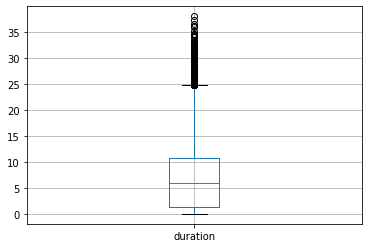

In [12]:
calls.boxplot("duration") #ящик с усами для длительности длительности разговора

Как мы видим,среднее и медиана практически совпадают с друг другом. Выбросы от 25 минут и более есть, однако считаю их не ошибочными, потому что возможно были длинные разговоры. Однако существует множество звонков по 0 минут, считаю, что для наших целей их следует удалить из выборки.

In [13]:
calls = calls.query('duration > 0').reset_index(drop=True) #сделаем срез данных, где длительность звонка больше 0
#сбрасываем индексы и назначем новые для красоты
calls['duration'] #столбец с длительностью

0         2.85
1        13.80
2         5.18
3        18.31
4        18.44
          ... 
162989    0.76
162990   18.83
162991   10.81
162992    4.27
162993   19.62
Name: duration, Length: 162994, dtype: float64

In [14]:
calls["call_date"] = pd.to_datetime(calls["call_date"], format = "%Y-%m-%d") #переводим в формат datetime
def round_up(x): #создаем функция для округления на верх
    if (x % 1) !=0:
        x = int(x) + 1
    return x
round_up(0.5)
calls["duration"] = calls["duration"].apply(round_up).astype(int) #применяем функцию и переводим в тип int
calls["duration"]

0          3
1         14
2          6
3         19
4         19
          ..
162989     1
162990    19
162991    11
162992     5
162993    20
Name: duration, Length: 162994, dtype: int64

In [15]:
calls["month"] = calls["call_date"].dt.month #добавим столбец с месяцем звонков

In [16]:
calls #проверяем

,id,call_date,duration,user_id,month
0,1000_2,2018-06-11,3,1000,6
1,1000_3,2018-09-21,14,1000,9
2,1000_4,2018-12-15,6,1000,12
3,1000_7,2018-08-22,19,1000,8
4,1000_8,2018-09-15,19,1000,9
...,...,...,...,...,...
162989,1499_215,2018-12-26,1,1499,12
162990,1499_216,2018-10-18,19,1499,10
162991,1499_217,2018-11-10,11,1499,11
162992,1499_218,2018-10-06,5,1499,10


Количество сделанных звонков разговоров по месяцам:

In [17]:
count_calls_month = calls.pivot_table(index=['month','user_id'], values = "duration", aggfunc = "count") 
#создаем сводную таблицу по идентификатору пользователя, со столбцами месяца звонка, и находим количество значений по продолжительности
count_calls_month

duration
month user_id          
1     1005           11
      1032           44
      1045            1
      1055           47
      1071           18
...                 ...
12    1494           54
      1495          120
      1496           65
      1497           58
      1499           56

[3168 rows x 1 columns]

Количество израсходованных минут разговора по месяцам:

In [18]:
sum_сalls_duration_month = calls.pivot_table(index=['month','user_id'], values = "duration", aggfunc = "sum") 
#создаем сводную таблицу по идентификатору пользователя, со столбцами месяца звонка, и находим сумму по продолжительности
sum_сalls_duration_month

duration
month user_id          
1     1005           95
      1032          380
      1045            9
      1055          551
      1071          194
...                 ...
12    1494          418
      1495         1031
      1496          518
      1497          545
      1499          492

[3168 rows x 1 columns]

### Таблица интернета

In [19]:
internet.info() #информация о интернете
internet #вывод таблицы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,"1,052.81",2018-09-07,1000
2,2,1000_2,"1,197.26",2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,"1,246.32",2018-11-26,1499


In [20]:
internet.duplicated().sum()#дубликаты отсутствуют

0

In [21]:
internet["mb_used"] = internet["mb_used"].apply(round_up).astype(int) #округляем вверх и приводим к int
internet["session_date"] = pd.to_datetime(internet["session_date"], format = "%Y-%m-%d") #приводим к формату datetime


In [22]:
internet = internet.drop(columns = ["Unnamed: 0"], axis = 1) #удаляем столбец дублирующий индексы
internet.columns #проверяем, вызвав метод возвращающий массив названий столбцов

Index(['id', 'mb_used', 'session_date', 'user_id'], dtype='object')

In [23]:
internet.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  int64         
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.6+ MB


In [24]:
internet["month"] = internet["session_date"].dt.month #вводим столбец месяца сессии интернет трафика

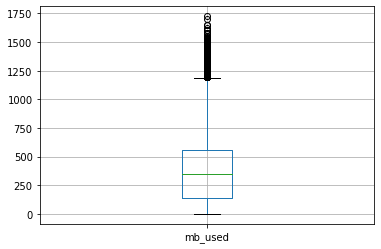

count   149,396.00
mean        370.62
std         278.39
min           0.00
25%         139.00
50%         349.00
75%         560.00
max       1,725.00
Name: mb_used, dtype: float64

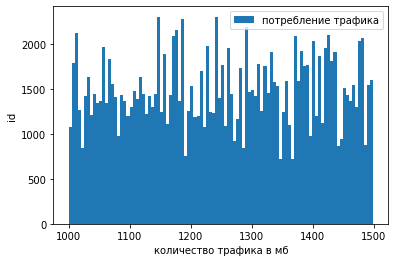

In [25]:
internet.boxplot("mb_used") #ящик с усами
plt.show()
internet.plot(y="user_id", x="mb_used", kind = "hist", bins = 100, label = "потребление трафика")
plt.xlabel("количество трафика в мб")
plt.ylabel("id")
internet["mb_used"].describe() #числовое описание

In [26]:
mb_used_month = internet.pivot_table(index=['month','user_id'], values = "mb_used", aggfunc = "sum")
mb_used_month
#таблица пользователя, потратившего трафик по месяцам

mb_used
month user_id         
1     1005        2730
      1032       24147
      1045        2348
      1055       17111
      1071       15622
...                ...
12    1494       17645
      1495       23450
      1496       20757
      1497       19940
      1499       13077

[3203 rows x 1 columns]

### Таблица сообщений

In [27]:
messages.info() #информация о сообщениях

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [28]:
messages["message_date"] = pd.to_datetime(messages["message_date"], format = "%Y-%m-%d") #приводим к формату datetime
messages["month"] = messages["message_date"].dt.month #добавляем столбец с месяцем

In [29]:
messages_count_month = messages.pivot_table(index=['month','user_id'], values = "id",  aggfunc = "count")
#переименуем столбец в смс,для лучшего чтения
messages_count_month

id
month user_id    
1     1005      7
      1032     38
      1045      5
      1055     30
      1071     16
...            ..
12    1493     78
      1495     84
      1496     51
      1497     17
      1499     66

[2717 rows x 1 columns]

### Помесячная выручка с каждого пользователя

In [30]:
money = count_calls_month.merge(sum_сalls_duration_month, on=['user_id', 'month'], how='outer') #связываем таблицы
money = money.merge(mb_used_month, on = ["user_id", "month"], how = "outer")
money = money.merge(messages_count_month, on = ["user_id", "month"], how = "outer")
money = money.rename(columns={'id': 'sms', "duration_x" : "count_calls", "duration_y" : "sum_calls_min"}) #переименовываем столбцы для удобстава
money

,,count_calls,sum_calls_min,mb_used,sms
user_id,month,,,,
1005,1,11.00,95.00,"2,730.00",7.00
1032,1,44.00,380.00,"24,147.00",38.00
1045,1,1.00,9.00,"2,348.00",5.00
1055,1,47.00,551.00,"17,111.00",30.00
1071,1,18.00,194.00,"15,622.00",16.00
...,...,...,...,...,...
1106,12,NaN,NaN,"18,722.00",24.00
1231,12,NaN,NaN,"32,481.00",191.00
1328,12,NaN,NaN,"39,461.00",7.00


Как мы видим, у нас есть сводная таблица, где по каждому пользователю, расписано, в какие месяцы сколько совершалось звонков, какая общая длительность, количество смс, использование трафика.
Предлагаю, изменить тип данных, для экономии данных.

In [31]:
try:
    money["sms"] = money["sms"].astype("int")
    print("Меняем тип данных")
except:
    print("Заполняем пропуски")

Заполняем пропуски


Видим ошибку, значит есть пустые данные, заменим их на 0, т.к. просто сообщений банально не отправлялось в данный промежуток времени. Мы могли это сделать другим путем, но я решил вспомнить это.

In [32]:
list_columns = ["count_calls", "sum_calls_min", "mb_used", "sms"] #делаем массив стобцов, по которым необходмо будет пройтись
for i in list_columns:
    money[i] = money[i].fillna(0).astype("int") #меняем на 0 и на тип данных int
money.info() #проверяем

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1005, 1) to (1489, 12)
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   count_calls    3214 non-null   int64
 1   sum_calls_min  3214 non-null   int64
 2   mb_used        3214 non-null   int64
 3   sms            3214 non-null   int64
dtypes: int64(4)
memory usage: 130.4 KB


In [33]:
money =  pd.DataFrame(money.to_records()) #используем to_records, чтобы преобразовать индекс (в нашем случае месяц) в массив данных


In [34]:
tariffs = tariffs.rename(columns = {"tariff_name":"tariff"}) #переименуем для склейки
money = money.merge(users, on='user_id', how='left').merge(tariffs, on='tariff', how='left')
money.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   user_id                3214 non-null   int64 
 1   month                  3214 non-null   int64 
 2   count_calls            3214 non-null   int64 
 3   sum_calls_min          3214 non-null   int64 
 4   mb_used                3214 non-null   int64 
 5   sms                    3214 non-null   int64 
 6   age                    3214 non-null   int64 
 7   churn_date             187 non-null    object
 8   city                   3214 non-null   object
 9   first_name             3214 non-null   object
 10  last_name              3214 non-null   object
 11  reg_date               3214 non-null   object
 12  tariff                 3214 non-null   object
 13  messages_included      3214 non-null   int64 
 14  mb_per_month_included  3214 non-null   int64 
 15  minutes_included     

In [35]:
money = money.drop(["age", "first_name", "last_name"], axis = "columns") #избавляемся это лишних столбцов, так как они не участвуют в анализе

In [36]:
money.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   user_id                3214 non-null   int64 
 1   month                  3214 non-null   int64 
 2   count_calls            3214 non-null   int64 
 3   sum_calls_min          3214 non-null   int64 
 4   mb_used                3214 non-null   int64 
 5   sms                    3214 non-null   int64 
 6   churn_date             187 non-null    object
 7   city                   3214 non-null   object
 8   reg_date               3214 non-null   object
 9   tariff                 3214 non-null   object
 10  messages_included      3214 non-null   int64 
 11  mb_per_month_included  3214 non-null   int64 
 12  minutes_included       3214 non-null   int64 
 13  rub_monthly_fee        3214 non-null   int64 
 14  rub_per_gb             3214 non-null   int64 
 15  rub_per_message      

In [37]:
money.head()

,user_id,month,count_calls,sum_calls_min,mb_used,sms,churn_date,city,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1005,1,11,95,2730,7,NaN,Набережные Челны,2018-01-25,smart,50,15360,500,550,200,3,3
1,1032,1,44,380,24147,38,NaN,Ульяновск,2018-01-04,smart,50,15360,500,550,200,3,3
2,1045,1,1,9,2348,5,NaN,Улан-Удэ,2018-01-30,smart,50,15360,500,550,200,3,3
3,1055,1,47,551,17111,30,NaN,Казань,2018-01-02,smart,50,15360,500,550,200,3,3
4,1071,1,18,194,15622,16,2018-08-31,Омск,2018-01-09,smart,50,15360,500,550,200,3,3


In [38]:
money = money.rename(columns={'messages_included': 'sms_limit', "mb_per_month_included" : "mb_limit", "minutes_included" : "calls_limit"})
#Переименовываем столбцы для удобства

In [39]:
money["delta_calls"] = money["sum_calls_min"] - money["calls_limit"] #сверхтарифное использование для звонков
money["delta_sms"] = money["sms"] - money["sms_limit"] #для смс
money["delta_mb"] = money["mb_used"] - money["mb_limit"] #для интернета
money.tail(10) #последние 10 строк

,user_id,month,count_calls,sum_calls_min,mb_used,sms,churn_date,city,reg_date,tariff,sms_limit,mb_limit,calls_limit,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,delta_calls,delta_sms,delta_mb
3204,1231,11,0,0,27459,173,NaN,Чебоксары,2018-05-23,ultra,1000,30720,3000,1950,150,1,1,-3000,-827,-3261
3205,1328,11,0,0,35567,8,NaN,Мурманск,2018-10-16,ultra,1000,30720,3000,1950,150,1,1,-3000,-992,4847
3206,1473,11,0,0,21692,14,NaN,Красноярск,2018-08-05,ultra,1000,30720,3000,1950,150,1,1,-3000,-986,-9028
3207,1489,11,0,0,17516,20,NaN,Санкт-Петербург,2018-08-15,smart,50,15360,500,550,200,3,3,-500,-30,2156
3208,1091,12,0,0,13292,42,NaN,Набережные Челны,2018-05-08,ultra,1000,30720,3000,1950,150,1,1,-3000,-958,-17428
3209,1106,12,0,0,18722,24,NaN,Калуга,2018-04-26,ultra,1000,30720,3000,1950,150,1,1,-3000,-976,-11998
3210,1231,12,0,0,32481,191,NaN,Чебоксары,2018-05-23,ultra,1000,30720,3000,1950,150,1,1,-3000,-809,1761
3211,1328,12,0,0,39461,7,NaN,Мурманск,2018-10-16,ultra,1000,30720,3000,1950,150,1,1,-3000,-993,8741
3212,1473,12,0,0,18432,20,NaN,Красноярск,2018-08-05,ultra,1000,30720,3000,1950,150,1,1,-3000,-980,-12288
3213,1489,12,0,0,17341,35,NaN,Санкт-Петербург,2018-08-15,smart,50,15360,500,550,200,3,3,-500,-15,1981


Отрицательные значения обозначают то, что входящие в тариф лимиты не были исчерпаны, теперь перейдем к подсчету денежных средств для пользователя.

In [40]:
def total_price(row): #фунция для подсчета деньжат
    calls_price = 0
    sms_price = 0
    internet_price = 0 
    if row["delta_calls"] > 0: #если все не израсходовано, то просто используется цена тарифа за месяц
        calls_price = row["delta_calls"] * row["rub_per_minute"]
    if row["delta_sms"] > 0:
        sms_price = row["delta_sms"] * row["rub_per_message"]
    if row["delta_mb"] > 0:
        internet_price = (row["delta_mb"] / 1024) * row["rub_per_gb"] 
    return (calls_price + sms_price + internet_price)
 

In [41]:
money["price_total"] = money.apply(total_price, axis = 1) #применяем функцию для всех строк
money["price_total"] = money["price_total"] + money["rub_monthly_fee"] #считаем сумму необходимую для оплаты

## Анализ данных

In [42]:
#создадим сводную таблицу, со всеми тарифами, и медианой, средним, дисперсия, среднее отклонение

In [43]:
analis_tariff_pivot = money.pivot_table(index = "tariff", values = ["mb_used", "sms", "sum_calls_min", "price_total"], aggfunc = ["median","mean",'var','std'])
analis_tariff_pivot #сводная таблица со значениями

median                                    mean                    \
       mb_used price_total sms sum_calls_min   mb_used price_total   sms   
tariff                                                                     
smart    16531      959.90  28           422 16,229.19    1,233.35 33.38   
ultra    19324    1,950.00  38           518 19,486.90    2,060.53 49.36   

                                var                                     \
       sum_calls_min        mb_used price_total      sms sum_calls_min   
tariff                                                                   
smart         417.93  34,545,911.13  620,452.61   796.81     36,219.32   
ultra         526.62 101,935,621.05  126,953.29 2,285.27    100,873.63   

             std                                  
         mb_used price_total   sms sum_calls_min  
tariff                                            
smart   5,877.58      787.69 28.23        190.31  
ultra  10,096.32      356.31 47.80        317.61

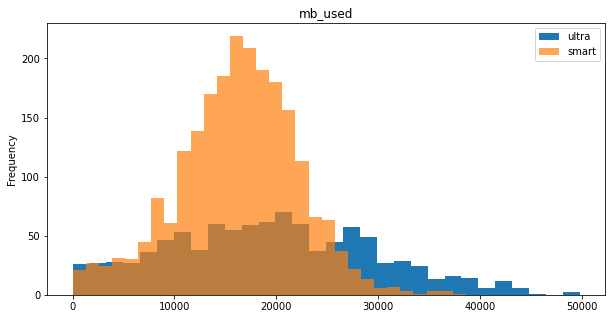

Среднее для ультра: 19486.90152284264
Среднее для смарта: 16229.188425302826
Медиана для ультра: 19324.0
Медиана для смарта: 16531.0
Дисперсия для ультра: 101935621.04821922
Дисперсия для смарта: 34545911.12695752
Стандартное отклонение для ультра: 10096.317202238608
Стандартное отклонение для смарта: 5877.576977544192


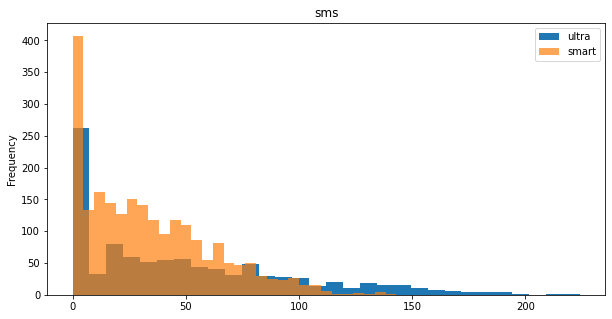

Среднее для ультра: 49.36345177664975
Среднее для смарта: 33.384028712427096
Медиана для ультра: 38.0
Медиана для смарта: 28.0
Дисперсия для ультра: 2285.2661425446736
Дисперсия для смарта: 796.8129584480083
Стандартное отклонение для ультра: 47.804457350174715
Стандартное отклонение для смарта: 28.22787555676141


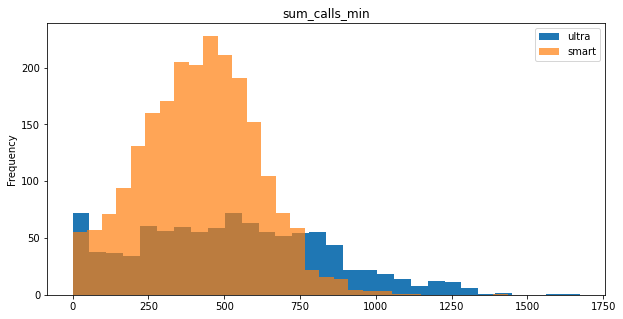

Среднее для ультра: 526.6233502538071
Среднее для смарта: 417.9349484073576
Медиана для ультра: 518.0
Медиана для смарта: 422.0
Дисперсия для ультра: 100873.63339730098
Дисперсия для смарта: 36219.31578434428
Стандартное отклонение для ультра: 317.6060978591264
Стандартное отклонение для смарта: 190.31372988921288


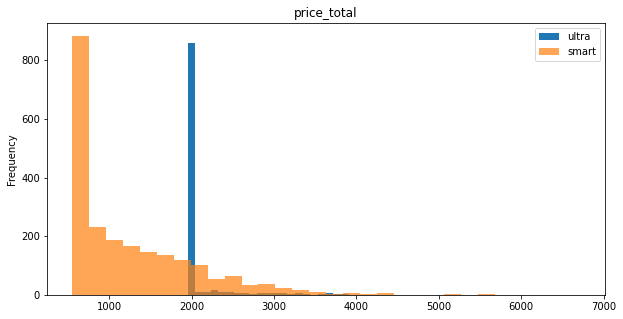

Среднее для ультра: 2060.5299710501267
Среднее для смарта: 1233.3494665489009
Медиана для ультра: 1950.0
Медиана для смарта: 959.8984375
Дисперсия для ультра: 126953.28545993957
Дисперсия для смарта: 620452.6075337975
Стандартное отклонение для ультра: 356.3050455156923
Стандартное отклонение для смарта: 787.6881410392043


In [44]:
analis_tariff_ultra = money.query('tariff == "ultra"') #срез по первому тарифу
analis_tariff_smart = money.query('tariff == "smart"') #срез по другому тарифу
columns = ["mb_used", "sms", "sum_calls_min", "price_total"]
for i in columns:
    analis_tariff_ultra[i].plot(kind = 'hist',bins = 30,label = 'ultra', figsize = (10,5))
    analis_tariff_smart[i].plot(kind = "hist", bins = 30, label = "smart", figsize = (10,5), alpha = 0.7) 
    plt.title(i) #подписываем графики
    plt.legend() #подписываем каждое распределение
    plt.show() #показать
    print("Среднее для ультра:", analis_tariff_ultra[i].mean())
    print("Среднее для смарта:", analis_tariff_smart[i].mean())
    print("Медиана для ультра:", analis_tariff_ultra[i].median())
    print("Медиана для смарта:", analis_tariff_smart[i].median())
    print("Дисперсия для ультра:", analis_tariff_ultra[i].var())
    print("Дисперсия для смарта:", analis_tariff_smart[i].var())
    print("Стандартное отклонение для ультра:", analis_tariff_ultra[i].std())
    print("Стандартное отклонение для смарта:", analis_tariff_smart[i].std())

* Вывод
* По количеству израсходованного трафика можно сделать вывод, что среднее значение использованного трафика у смарт и ультра отличаются, у смарта график склоняется левее, чем у смарта. Что позволяет сделать вывод, что использование трафика в ультре больше чем в смарте.
* По количеству sms :есть люди которые не пользуются ими вовсе, они занимают значительную часть выборки. Ситуация аналогична, значения в среднем находятся левее у смарта, в отличии от ультры, следовательно используют смс чаще.
* По звонкам аналогично, скос в лево во стороны смарта
* по цене явный скок, но это логично, ведь начальная цена смарта явно выше ультры.
* Стоит отметить, что у пользователей смарта всегда используется больше базового количества трафика. Среднее, медиана доказывают, что пользователи смарта зачастую не расходуют весь пакет по смс и звонкам.
* Для тарифа ультра: Практически все пользователи используют полностью пакет интернета, сообщения их совершенно не интересуют,звонки израсходуются не все. 

## Проверка гипотез

* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

### Проверка гипотезы 1
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются - нулевая гипотеза
* средняя выручка пользователей тарифов «Ультра» и «Смарт» равны - альтернативная

In [45]:
alpha = 0.01
money_smart = money.query('tariff == "smart"')["price_total"]
money_ultra = money.query('tariff == "ultra"')["price_total"]
print("Значение pvalue для двух выборк:", st.stats.ttest_ind(money_smart, money_ultra).pvalue)

Значение pvalue для двух выборк: 1.172655564462924e-190


Так как значение крайне мало, следовательно, мы отвергаем альтернативную гипотезу, подтверждая нулевую гипотезу.

Дисперсия для смарта: 620174.2528422166
Дисперсия для утра: 126824.39887571629


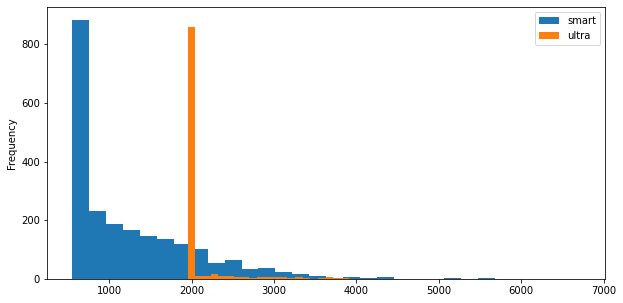

In [46]:
money.query('tariff == "smart"')["price_total"].plot(kind = "hist", bins = 30 ,label = 'smart', figsize = (10,5))
money.query('tariff == "ultra"')["price_total"].plot(kind = "hist", bins = 30 ,label = 'ultra', figsize = (10,5))
plt.legend() 
print("Дисперсия для смарта:",np.var(money_smart)) 
print("Дисперсия для утра:",np.var(money_ultra))

Диаграмма и дисперсия подверждают, что средняя выручка различается. 

### Проверка гипотезы 2

* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов - нулевая гипотеза 
* средняя выручка пользователей из Москвы равна выручке пользователей из других регионов - альтернативная гипотеза

In [47]:
alpha = 0.01
money_msk = money.query('city == "Москва"')["price_total"]
money_not_msk = money.query('city != "Москва"')["price_total"]
print("Значение pvalue для двух выборк:", st.stats.ttest_ind(money_msk, money_not_msk).pvalue)

Значение pvalue для двух выборк: 0.47443187631524797


Значение p-величины больше 10%, cледовательно альтернативная гипотеза верна, а нулевую гипотезу отвергнуть не можем.

In [48]:
print("Дисперсия для Москвы:",np.var(money_msk)) 
print("Дисперсия для отстальных городов:",np.var(money_not_msk))

Дисперсия для Москвы: 546347.0989109281
Дисперсия для отстальных городов: 630261.63263902


Мера разброса в обоих случаях - велика, как и вероятность нулевой гипотезы, следовательно снова нулевую гипотезу отвергнуть мы не сможем.

## Общий вывод

Таким образом, в рамках проекта:
* Были исследованы датасеты
* Проведен их анализ
* Заполнены пропуски
* Изменены типы переменных
* Построена сортировка различных показателей по месяцам
* Посчитана выручка с каждого пользователя
* Сделан вывод, что пользователи двух тарифов чаще всего не расходуют полностью смс и звонки. Пользователи смарта чаще всего доплачивают за интернет. График для смарта всегда склонен влево, а это обозначает меньшие показатели, чем у ультры
* Была подверждена гипотеза - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.
* Была подверждена гипотеза - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.